<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Ficzon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Goal**
1. **Extracted data from the given database using SQL techniques**.
2. **Data exploration method is used to share insights related to Sales effectiveness**.
3. **Various machine learning algorithms are used to predict the Lead category(High potential , Low potential)** .

# **Database details**
* **DB Name:project_sales** 
* **Table Name:data**
* **Host:19.136.157.135**
* **Port:3306**
* **Username:dm_team2**
* **Password:DM!$Team&27@9!20!**

# **APPROACH**
 * **Importing basic libraries**
 * **Reading the dataset from the database using SQL**
 * **Data preprocessing**
 * **Exploratory data Analysis(EDA)**
 * **Label encoder is used to encode the categorical variables**
 * **Minmax scaler is used to scale the data**
 * **Various classification algorithms are used**
 * **Model is evaluated using different classification metrics like accuracy,recall,confusion matrix and f1_score**
 * **Hyperparameter tuning is done to increase the accuracy**

##**SQL is used to extract data from database**

In [ ]:
!pip install sqlalchemy

In [ ]:
!pip install pymysql

     |████████████████████████████████| 51kB 4.0MB/s 


In [ ]:
from sqlalchemy import create_engine

In [ ]:
import pandas as pd

In [ ]:
DB_name='project_sales'
table_name='data'
Host='18.136.157.135:3306'
username='dm_team2'
password='DM!$Team&27@9!20!'

In [ ]:
conn=create_engine('mysql+pymysql://'+username+':'+password+'@'+Host+'/'+DB_name)

In [ ]:
conn.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['data']

In [ ]:
query='select* from data'

In [ ]:
data=pd.read_sql(query,conn)

In [ ]:
print(data.shape)

(7422, 9)


In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [ ]:
query='select distinct(Status) from data'
unique_status=pd.read_sql(query,conn)
unique_status

,Status
0,Open
1,Potential
2,In Progress Positive
3,Not Responding
4,Just Enquiry
5,Junk Lead
6,CONVERTED
7,In Progress Negative
8,LOST
9,Long Term


In [ ]:
query='select distinct(Location) from data'
unique_location=pd.read_sql(query,conn)
unique_location

,Location
0,
1,Bangalore
2,Other Locations
3,UAE
4,Trivandrum
5,Hyderabad
6,Chennai
7,UK
8,USA
9,Delhi


In [ ]:
query='select distinct(Source) from data'
unique_Source=pd.read_sql(query,conn)
unique_Source

,Source
0,Website
1,
2,Live Chat-Google Organic
3,Call
4,Live Chat-Direct
5,By Recommendation
6,Customer Referral
7,Live Chat-Blog
8,Live Chat -PPC
9,Live Chat-Google Ads


In [ ]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [ ]:
data.to_csv("data_client.csv")

##**Data is extracted**

In [ ]:
data1 = pd.read_csv("data_client.csv")
data1.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [ ]:
data1.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [ ]:
data1 = data1.drop(['Unnamed: 0','Created','Mobile','EMAIL'],axis=1)

In [ ]:
data1.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


##**Handling missing values**

In [ ]:
data1.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [ ]:
data1=data1.fillna(0)

In [ ]:
data1.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [ ]:
data1.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.0,Website,Sales-Agent-11,0,Mode-5,Open
1,0.0,Website,Sales-Agent-10,0,Mode-5,Open
2,0.0,Website,Sales-Agent-10,0,Mode-5,Open
3,0.0,Website,Sales-Agent-10,0,Mode-5,Open
4,0.0,Website,Sales-Agent-10,0,Mode-5,Open


In [ ]:
data1.shape

(7422, 6)

## **Lead categories are classified into high and low potential**

In [ ]:
data1['Status']=data1['Status'].replace(['Open','Potential','In Progress Positive','CONVERTED','Long Term'],1)
data1['Status']=data1['Status'].replace(['Not Responding','Just Enquiry','Junk Lead','In Progress Negative','LOST'],0)

In [ ]:
data1.Status

0       1
1       1
2       1
3       1
4       1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Status, Length: 7422, dtype: object

In [ ]:
data1

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.0,Website,Sales-Agent-11,0,Mode-5,1
1,0.0,Website,Sales-Agent-10,0,Mode-5,1
2,0.0,Website,Sales-Agent-10,0,Mode-5,1
3,0.0,Website,Sales-Agent-10,0,Mode-5,1
4,0.0,Website,Sales-Agent-10,0,Mode-5,1
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0


#**Import basic packages**

In [ ]:

# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#**Exploratory data analysis**

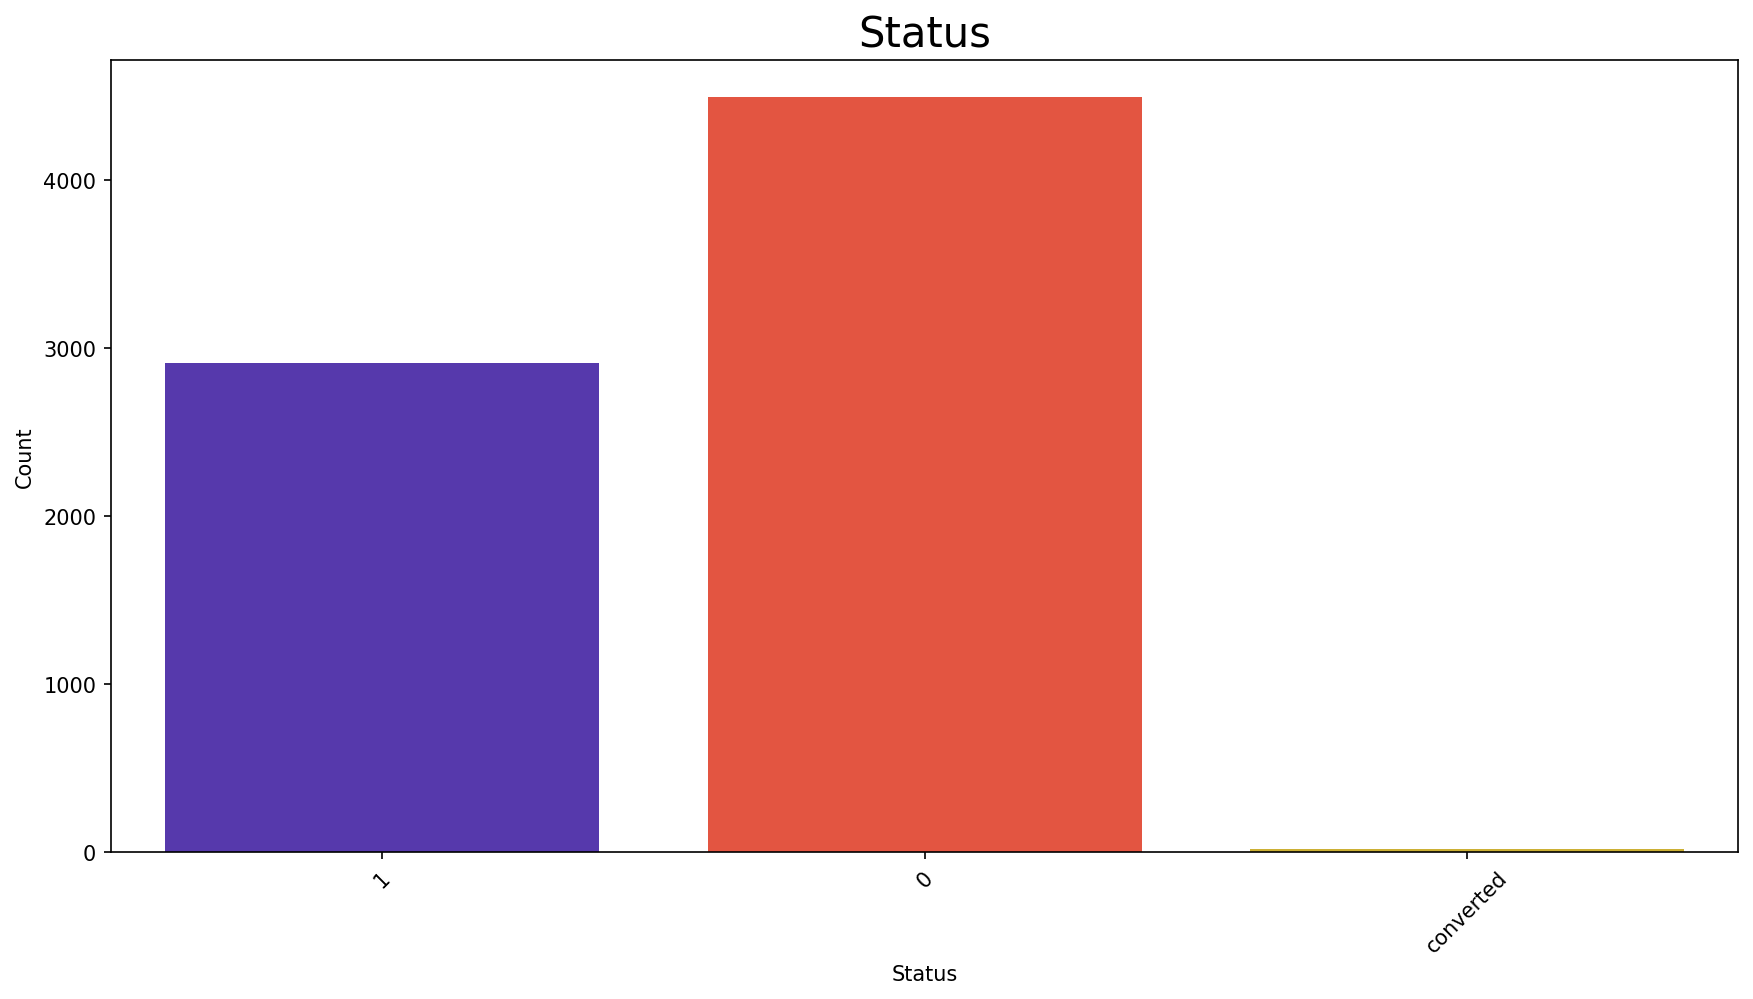

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('Status',data=data1,palette='CMRmap')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Status',fontsize = 20)
plt.show()

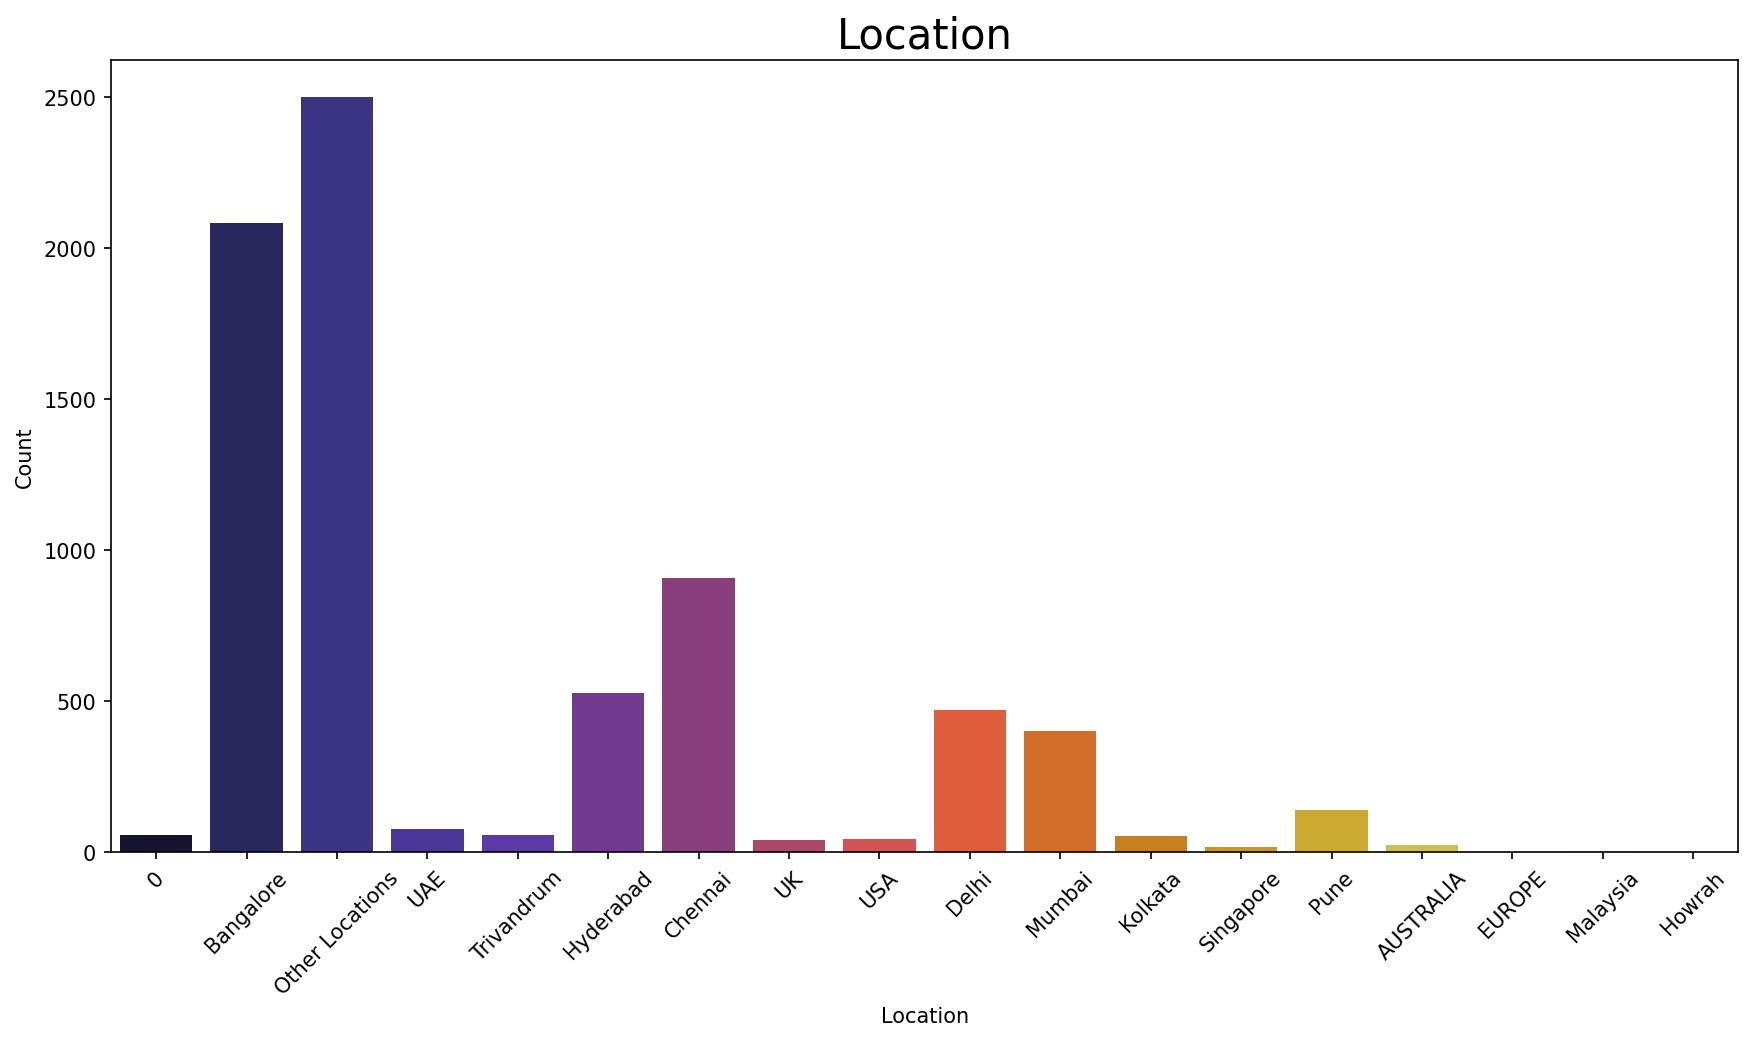

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('Location',data=data1,palette='CMRmap')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Location',fontsize = 20)
plt.show()


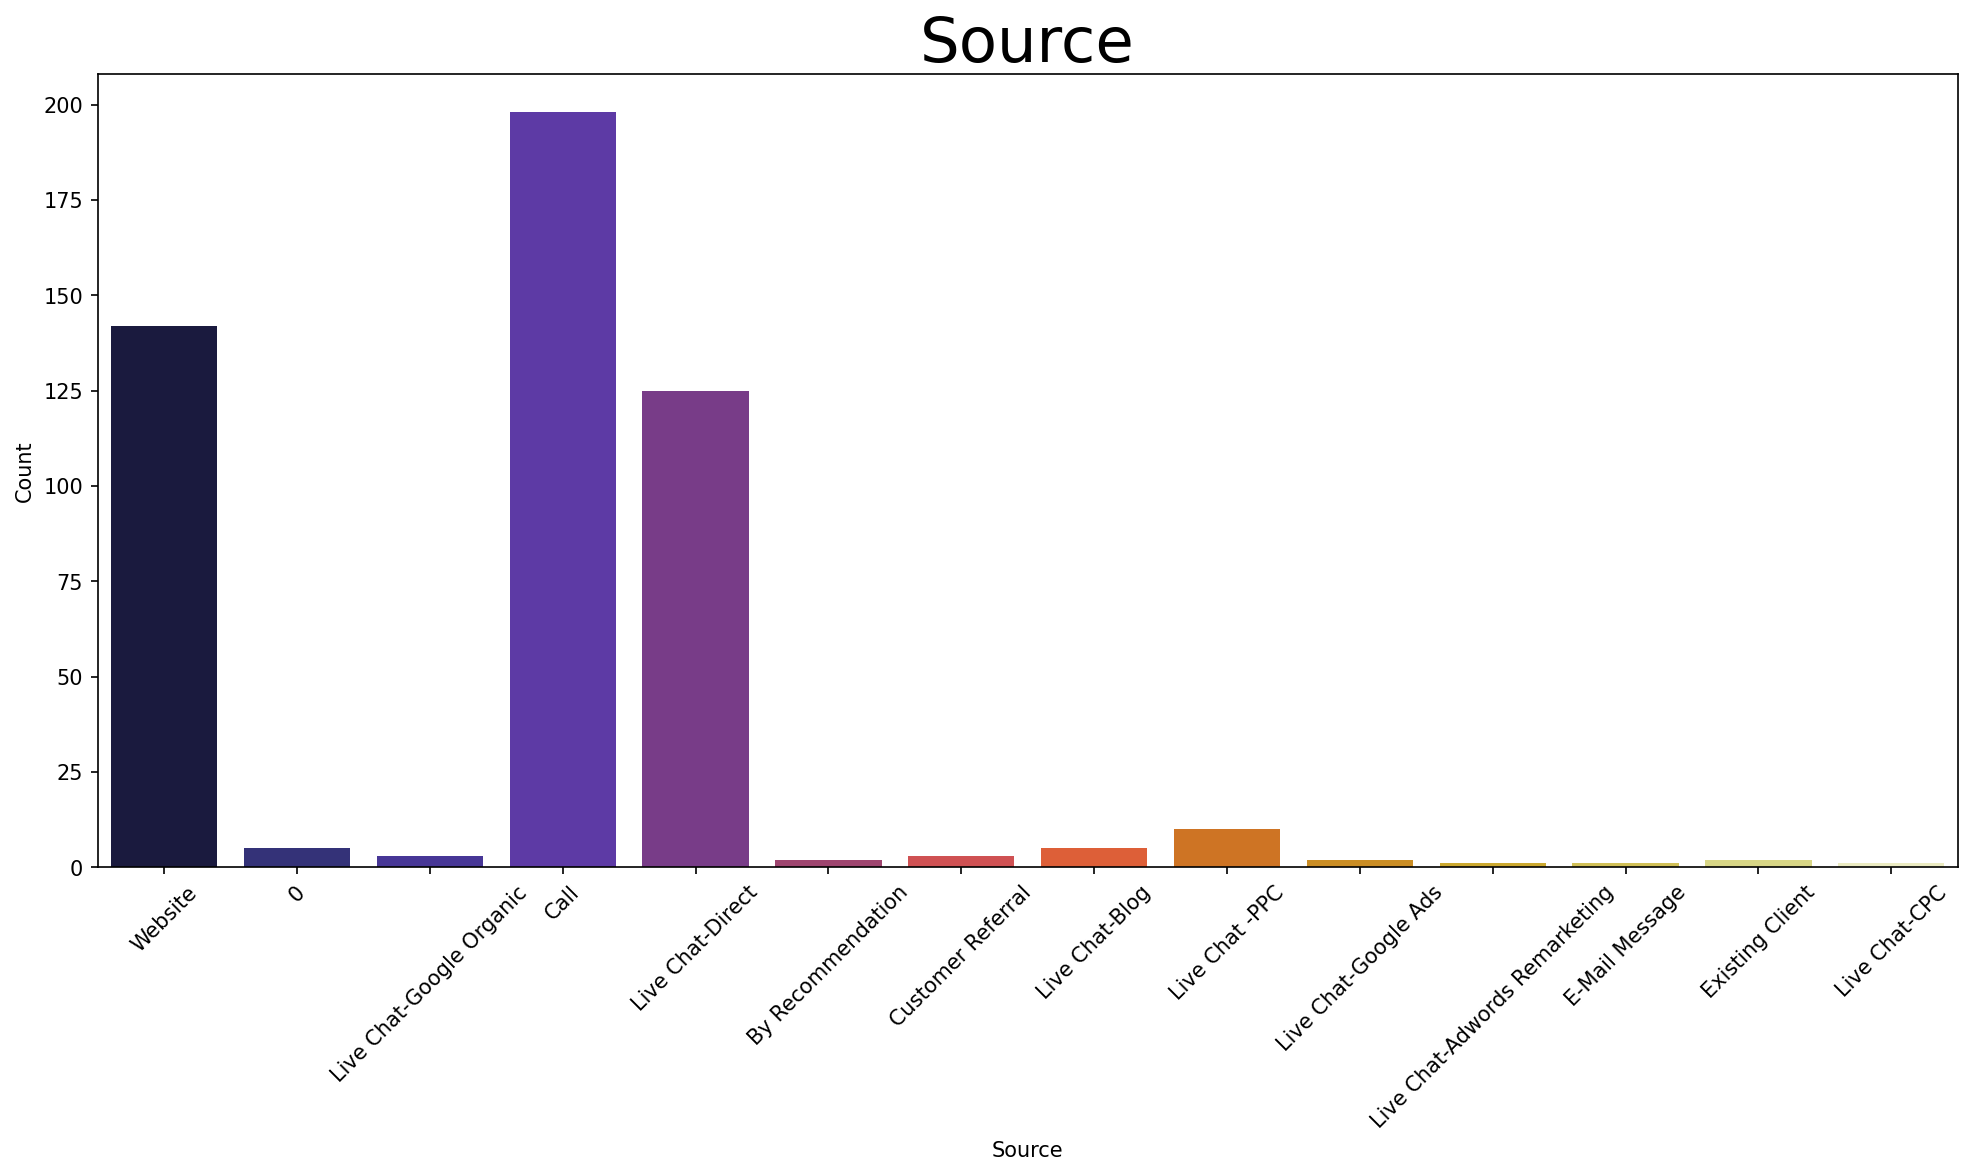

In [ ]:
plt.figure(figsize=(16,7),dpi=150)
sns.countplot('Source',data=data1.head(500),palette='CMRmap')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Source',fontsize = 30)
plt.show()


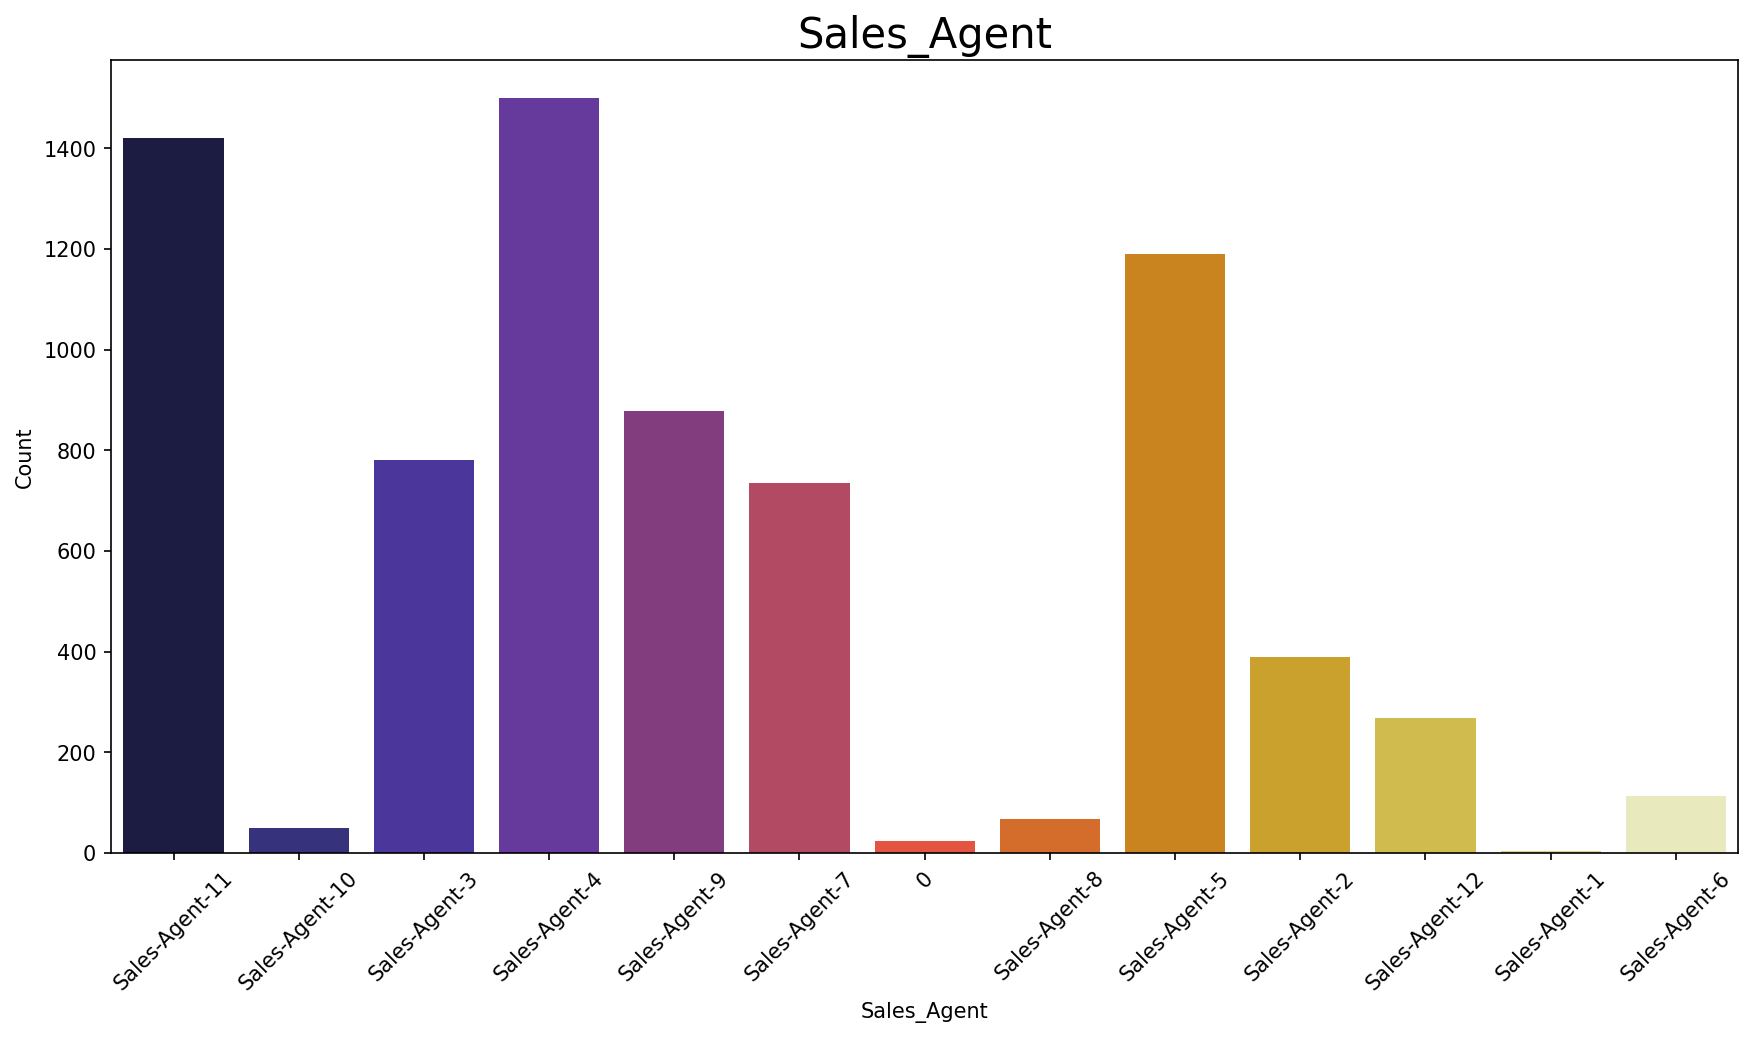

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('Sales_Agent',data=data1,palette='CMRmap')
plt.xlabel('Sales_Agent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Sales_Agent',fontsize = 20)
plt.show()

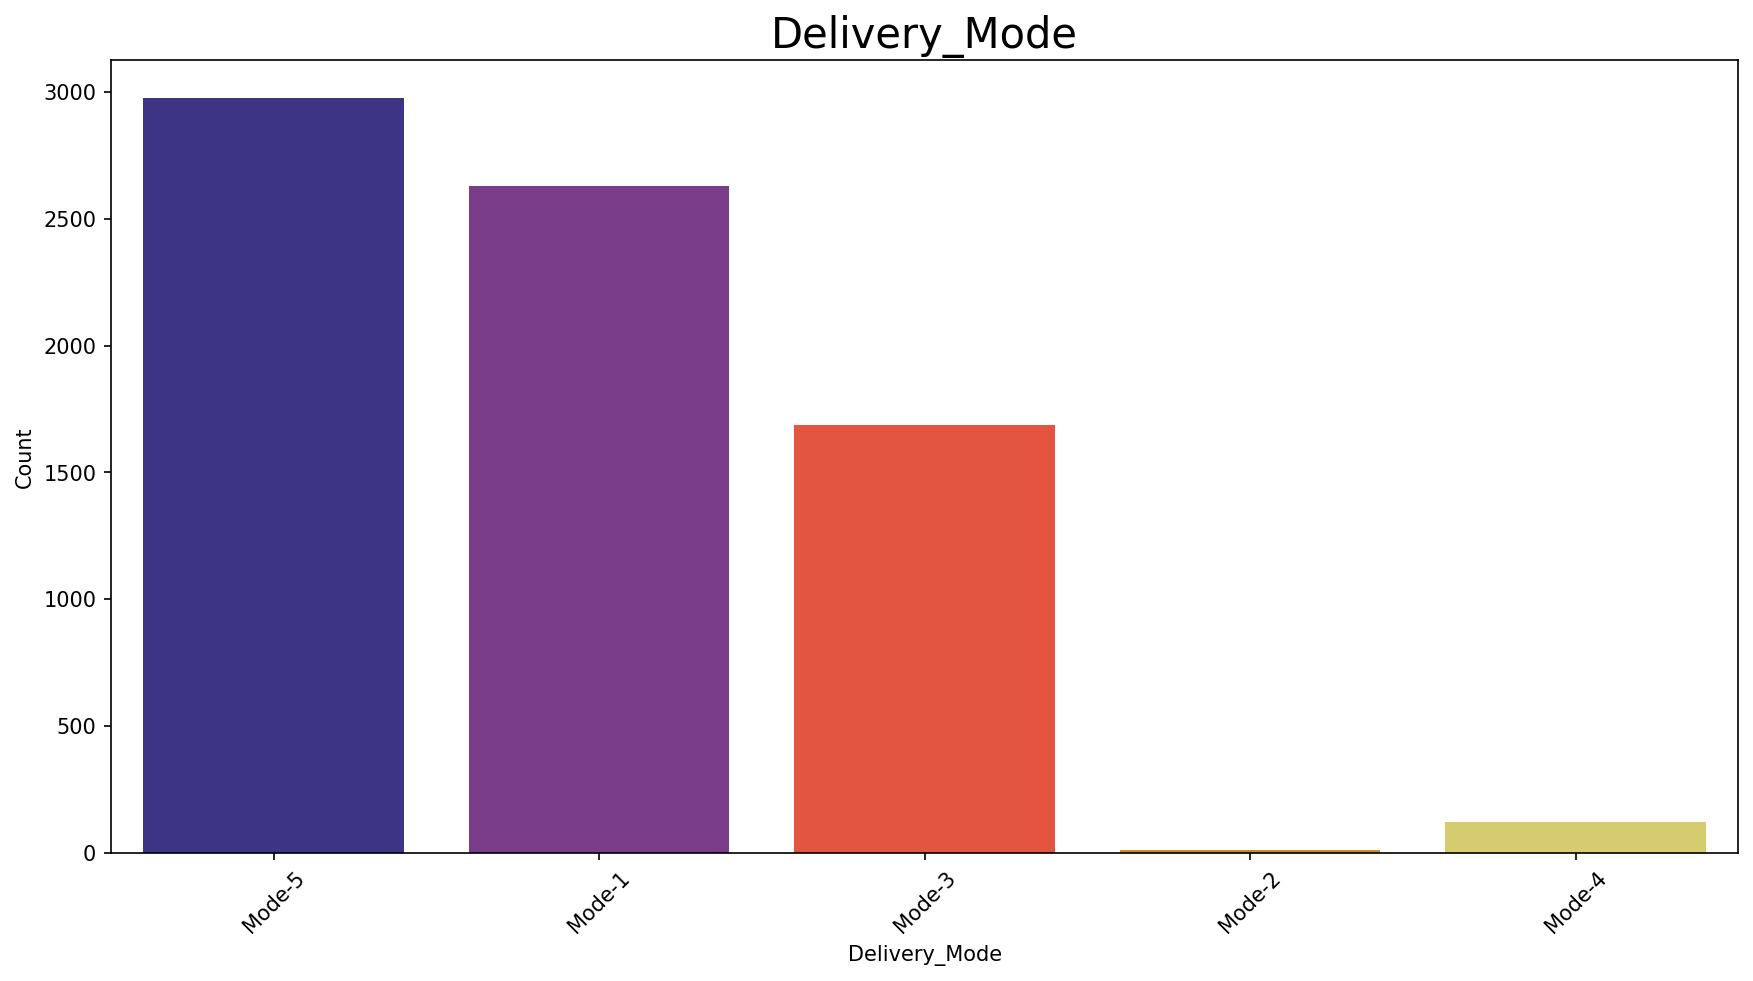

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('Delivery_Mode',data=data1,palette='CMRmap')
plt.xlabel('Delivery_Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Delivery_Mode',fontsize = 20)
plt.show()

In [ ]:
data1.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [ ]:
cat_data=['Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status']

## **Label encoder is used to encode the categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for feat in cat_data:
  data1[feat]=label.fit_transform(data1[feat].astype(str))

In [ ]:
data1.tail()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
7417,9.0,3,9,10,3,0
7418,15.0,3,4,11,4,0
7419,5.0,15,3,2,0,0
7420,21.0,2,7,11,0,0
7421,25.0,25,6,3,0,1


##**Split data into x and y**

In [ ]:
x_fea=data1.iloc[:,:-1]
y_fea=data1[['Status']]

## **Minmax scaler is used to scale the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
model_max=MinMaxScaler()
print(model_max.fit(x_fea))
print(model_max.data_max_)
data1=model_max.transform(x_fea)
scaled_data=pd.DataFrame(data1, columns = x_fea.columns)
scaled_data

MinMaxScaler(copy=True, feature_range=(0, 1))
[28. 25. 12. 17.  4.]


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.000000,1.00,0.250000,0.000000,1.00
1,0.000000,1.00,0.166667,0.000000,1.00
2,0.000000,1.00,0.166667,0.000000,1.00
3,0.000000,1.00,0.166667,0.000000,1.00
4,0.000000,1.00,0.166667,0.000000,1.00
...,...,...,...,...,...
7417,0.321429,0.12,0.750000,0.588235,0.75
7418,0.535714,0.12,0.333333,0.647059,1.00
7419,0.178571,0.60,0.250000,0.117647,0.00
7420,0.750000,0.08,0.583333,0.647059,0.00


In [ ]:
X=scaled_data
Y=y_fea

##**Train_test_split is used to split the data into train and test**

In [ ]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((4972, 5), (2450, 5), (2450, 1), (4972, 1))

#**Model Selection**

**XGB**


In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))


accuracy score :
 0.7171428571428572
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1462
           1       0.70      0.52      0.60       981
           2       0.00      0.00      0.00         7

    accuracy                           0.72      2450
   macro avg       0.47      0.46      0.46      2450
weighted avg       0.71      0.72      0.71      2450



**SVM**

In [ ]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))

accuracy score :
 0.6853061224489796
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1462
           1       0.67      0.42      0.52       981
           2       0.00      0.00      0.00         7

    accuracy                           0.69      2450
   macro avg       0.45      0.43      0.43      2450
weighted avg       0.68      0.69      0.67      2450



**SGD**

In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgd=SGDClassifier()
model_sgd.fit(x_train,y_train)
sgd_predict=model_sgd.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=sgd_predict))
print(classification_report(y_test,sgd_predict))

accuracy score :
 0.6685714285714286
              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1462
           1       0.57      0.69      0.62       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.45      0.44      2450
weighted avg       0.68      0.67      0.67      2450



**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))


accuracy score :
 0.6746938775510204
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1462
           1       0.61      0.54      0.57       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.44      0.44      2450
weighted avg       0.67      0.67      0.67      2450



**LGB**

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))

accuracy score :
 0.7073469387755102
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1462
           1       0.67      0.54      0.60       981
           2       0.00      0.00      0.00         7

    accuracy                           0.71      2450
   macro avg       0.46      0.45      0.46      2450
weighted avg       0.70      0.71      0.70      2450



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))

accuracy score :
 0.6755102040816326
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1462
           1       0.62      0.52      0.56       981
           2       0.25      0.29      0.27         7

    accuracy                           0.68      2450
   macro avg       0.52      0.53      0.52      2450
weighted avg       0.67      0.68      0.67      2450



**Logistic**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
log_predict=model_log.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print(classification_report(y_test,log_predict))

accuracy score :
 0.673469387755102
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1462
           1       0.61      0.50      0.55       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.43      0.43      2450
weighted avg       0.66      0.67      0.67      2450



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')
model_KNN.fit(x_train,y_train)
KNN_predict=model_KNN.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print(classification_report(y_test,KNN_predict))

accuracy score :
 0.6653061224489796
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      1462
           1       0.66      0.36      0.46       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.41      0.41      2450
weighted avg       0.66      0.67      0.64      2450



**Adaboost**

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()
model_ab.fit(x_train,y_train)
ab_predict=model_ab.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print(classification_report(y_test,ab_predict))

accuracy score :
 0.6861224489795918
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1462
           1       0.65      0.48      0.55       981
           2       0.00      0.00      0.00         7

    accuracy                           0.69      2450
   macro avg       0.45      0.44      0.44      2450
weighted avg       0.68      0.69      0.67      2450



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
gb_predict=model_gb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print(classification_report(y_test,gb_predict))

accuracy score :
 0.7208163265306122
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1462
           1       0.70      0.54      0.61       981
           2       0.00      0.00      0.00         7

    accuracy                           0.72      2450
   macro avg       0.48      0.46      0.46      2450
weighted avg       0.72      0.72      0.71      2450



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
NB_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=NB_predict))
print(classification_report(y_test,NB_predict))

accuracy score :
 0.6714285714285714
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1462
           1       0.60      0.53      0.56       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.43      0.43      2450
weighted avg       0.66      0.67      0.67      2450



In [ ]:
X.shape

(7422, 5)

**ANN**

In [ ]:
#importing the model
from keras.models import Sequential
from keras.layers import Dense # To get layers
model=Sequential()# intialising the model

In [ ]:
model.add(Dense(units=12,input_dim=6, activation ='relu'))# first layer
model.add(Dense(units=12,activation='relu'))  # second layer or hidden layer
model.add(Dense(units=12,activation='relu'))  # second layer or hidden layer
model.add(Dense(units=1,activation='sigmoid'))#last layer or output layer

In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=100, verbose=1)

Epoch 1/100
498/498 [==============================] - 3s 3ms/step - loss: 0.6774 - accuracy: 0.6057
Epoch 2/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6690 - accuracy: 0.6120
Epoch 3/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.6098
Epoch 4/100
498/498 [==============================] - 1s 2ms/step - loss: 0.6696 - accuracy: 0.6108
Epoch 5/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6690 - accuracy: 0.6129
Epoch 6/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6709 - accuracy: 0.6077
Epoch 7/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.6151
Epoch 8/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6748 - accuracy: 0.6002
Epoch 9/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6713 - accuracy: 0.6083
Epoch 10/100
498/498 [==============================] - 1s 3ms/step - loss: 0.6721 - accura

In [ ]:
loss_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss:',loss_accuracy[0])
print('Test Accuracy:',loss_accuracy[1])

Test_loss: 0.6754930019378662
Test Accuracy: 0.5967347025871277


**HYPER PARAMETER TUNINING**

##**XGB**

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))

accuracy score :
 0.7261224489795919
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1462
           1       0.70      0.55      0.62       981
           2       0.00      0.00      0.00         7

    accuracy                           0.73      2450
   macro avg       0.48      0.47      0.47      2450
weighted avg       0.72      0.73      0.72      2450



##**SVM**

In [ ]:
from sklearn import svm
model_svm = svm.SVC(C=1, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=40)
model_svm.fit(x_train, y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))

accuracy score :
 0.6853061224489796
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1462
           1       0.67      0.42      0.52       981
           2       0.00      0.00      0.00         7

    accuracy                           0.69      2450
   macro avg       0.45      0.43      0.43      2450
weighted avg       0.68      0.69      0.67      2450



##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=10,
                       verbose=0, warm_start=False)
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)

from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))

accuracy score :
 0.7126530612244898
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1462
           1       0.68      0.53      0.60       981
           2       0.00      0.00      0.00         7

    accuracy                           0.71      2450
   macro avg       0.47      0.46      0.46      2450
weighted avg       0.71      0.71      0.70      2450



#**LGB**

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier( max_depth=10,learning_rate=0.09,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=40, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))

accuracy score :
 0.7212244897959184
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1462
           1       0.69      0.56      0.62       981
           2       0.00      0.00      0.00         7

    accuracy                           0.72      2450
   macro avg       0.48      0.46      0.47      2450
weighted avg       0.72      0.72      0.71      2450



##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))

accuracy score :
 0.686530612244898
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1462
           1       0.63      0.54      0.58       981
           2       0.50      0.29      0.36         7

    accuracy                           0.69      2450
   macro avg       0.62      0.54      0.56      2450
weighted avg       0.68      0.69      0.68      2450



##**Logistic**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model_log.fit(x_train,y_train)
log_predict=model_log.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print(classification_report(y_test,log_predict))

accuracy score :
 0.673469387755102
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1462
           1       0.61      0.50      0.55       981
           2       0.00      0.00      0.00         7

    accuracy                           0.67      2450
   macro avg       0.44      0.43      0.43      2450
weighted avg       0.66      0.67      0.67      2450



##**Gradient Boosting**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model_gb.fit(x_train,y_train)
gb_predict=model_gb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print(classification_report(y_test,gb_predict))

accuracy score :
 0.7253061224489796
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1462
           1       0.71      0.54      0.61       981
           2       0.00      0.00      0.00         7

    accuracy                           0.73      2450
   macro avg       0.48      0.46      0.47      2450
weighted avg       0.72      0.73      0.72      2450



In [ ]:
import pandas as pd
Scores={'Model':['XGB','SVM','SGD','Random Forest','LGB','Decision tree','Logistic' ,'KNN' , 'Adaboost','Gradient boost','Naive Bayes','ANN']
,'Accuracy_before':[0.717,0.685,0.668,0.674,0.707,0.675,0.673,0.665,0.686,0.72,0.67,0.675],'Accuracy_after_tuning':[0.726,0.685,0.668,0.712,0.72,0.686,0.673,0.665,0.686,0.725,0.67,0.675]}
pd.DataFrame(Scores)

,Model,Accuracy_before,Accuracy_after_tuning
0,XGB,0.717,0.726
1,SVM,0.685,0.685
2,SGD,0.668,0.668
3,Random Forest,0.674,0.712
4,LGB,0.707,0.720
5,Decision tree,0.675,0.686
6,Logistic,0.673,0.673
7,KNN,0.665,0.665
8,Adaboost,0.686,0.686
9,Gradient boost,0.720,0.725
